# Digit Recognition

## Problem Statement
A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.

The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image.

## Data Understanding 

Let's first understand the shape, attributes etc. of the dataset.

In [58]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# dataset
digits = pd.read_csv("train.csv")
digits_test = pd.read_csv("test.csv")

In [59]:
# about the dataset

# dimensions
print("Dimensions: ", digits.shape, "\n")

# data types
print(digits.info())

# head
digits.head()

Dimensions:  (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#cheking for duplicates
digits.drop_duplicates(keep='first')
digits.shape

(42000, 785)

In [61]:
#No Duplicates. Now getting a list of all the Digits in the dataset
order = list(np.sort(digits['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Data Preparation

In [62]:
#Mean Values for pixels
digits_means = digits.groupby('label').mean()
digits_means.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


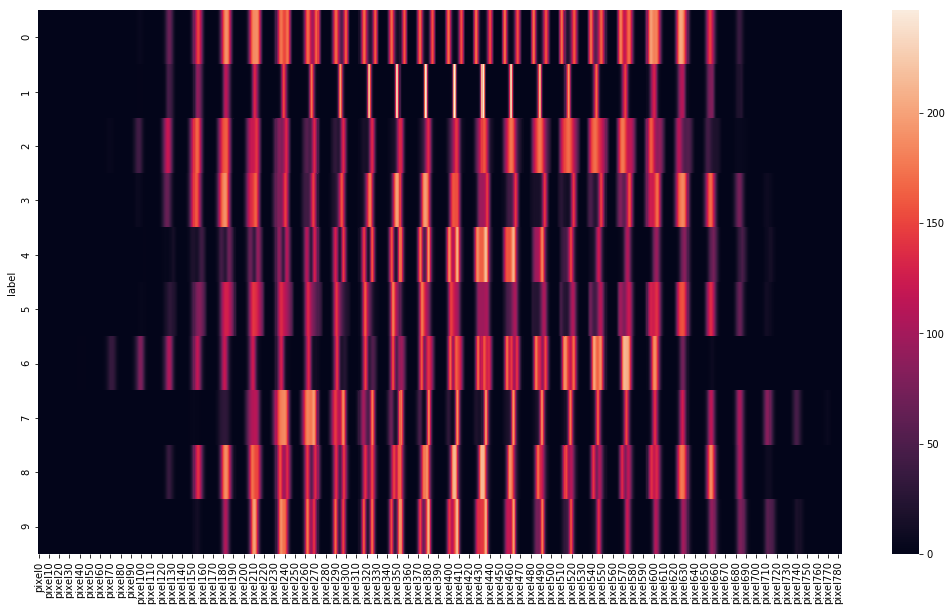

In [63]:

plt.figure(figsize=(18, 10))
sns.heatmap(digits_means)

#### We can say from above that pixels 0-50 and 760-783 are zeroes for all the digits and have no variations. 
#### Lets confirm this using describe


In [64]:
list1 =['pixel0','pixel1','pixel2','pixel3','pixel4','pixel5','pixel6','pixel7','pixel8','pixel9',
               'pixel10','pixel11','pixel12','pixel13','pixel14','pixel15','pixel16','pixel17','pixel18','pixel19',
               'pixel20','pixel21','pixel22','pixel23','pixel24','pixel25','pixel26','pixel27','pixel28','pixel29',
               'pixel30','pixel31','pixel32','pixel33','pixel34','pixel35','pixel36','pixel37','pixel38','pixel39',
               'pixel40','pixel41','pixel42','pixel43','pixel44','pixel45','pixel46','pixel47','pixel48','pixel49','pixel50',
               'pixel760','pixel761','pixel762','pixel763','pixel764','pixel765','pixel766','pixel767','pixel768','pixel769',
               'pixel770','pixel771','pixel772','pixel773','pixel774','pixel775','pixel776','pixel777','pixel778','pixel779',
               'pixel780','pixel781','pixel782','pixel783']
digits[list1].describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


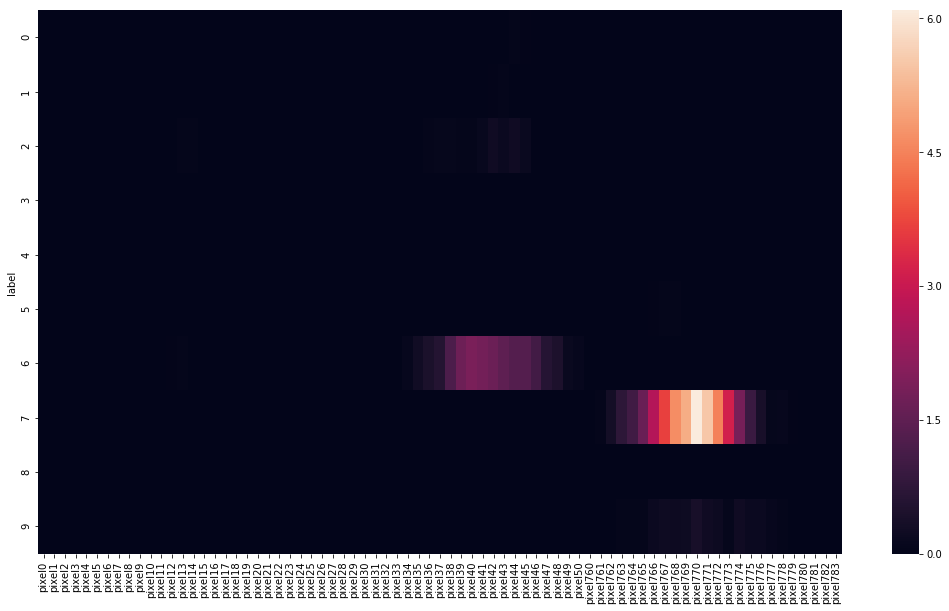

In [65]:
#Since above was not clear, lets plot a heat map for only these pixels.
plt.figure(figsize=(18, 10))
sns.heatmap(digits_means[list1])

#### Since pixels 35-50 and 763-776 contain some information. Removing 0-35,760-762 and 777-784

In [66]:
list2 = ['pixel35','pixel36','pixel37','pixel38','pixel39',
              'pixel40','pixel41','pixel42','pixel43','pixel44','pixel45','pixel46','pixel47','pixel48','pixel49','pixel50',
              'pixel763','pixel764','pixel765','pixel766','pixel767','pixel768','pixel769',
              'pixel770','pixel771','pixel772','pixel773','pixel774','pixel775','pixel776']
for x in list2:
    list1.remove(x)

In [67]:
digits.drop(list1,axis=1,inplace=True)
digits.shape

(42000, 740)

In [68]:
digits_test_bkup = pd.DataFrame(digits_test)
digits_test.drop(list1,axis=1,inplace=True)

print(digits_test.shape)
print(digits_test_bkup.shape)

(28000, 739)
(28000, 784)


# Model Building

In [69]:
# splitting into X and y
X = digits.drop("label", axis = 1)
y = digits['label']

#### Since the number of rows are higher. Lets select only a small sample for training. I have selected only 15% for training.

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [71]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 101)

X_train.shape

(4200, 739)

In [72]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [73]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9042592592592592 

[[3615    0   12    8    8   28   28    5    9    2]
 [   0 4089   16   23    9    3    3   13   25    4]
 [  54   48 3363   64   74   13   53   52   59   10]
 [  20   28  121 3387    8  175    5   54   58   44]
 [  12   12   26    2 3399    7   41   41    4  158]
 [  49   42   32  177   41 2899   54   14   82   28]
 [  36   16   55    5   34   37 3486    3   21    0]
 [   9   27   37   22   70   10    4 3619   14  142]
 [  26   86   71  137   24  137   29   26 3096   33]
 [  38   11   39   26  182   19    1  207   27 3228]]


The linear model gives approx. 90% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [74]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [75]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9254497354497354 

[[3579    0   15   10    3   13   56   16   22    1]
 [   0 4106   14   16    7    1    6   20    9    6]
 [  22   19 3412   59   41    6   38  132   55    6]
 [   3   17   87 3529    4   74    9   82   64   31]
 [   5   11   45    4 3432   12   26   54    5  108]
 [  19   20   19  122   16 3013   86   60   33   30]
 [  32   10   10    1   11   30 3529   48   22    0]
 [   3   24   27   11   30    5    1 3755    6   92]
 [  12   48   38   77   22   94   23   54 3257   40]
 [  21   10   16   47   93    8    0  195   18 3370]]


The non-linear model gives approx. 92.5% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [76]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 14.6min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [77]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,20.448941,0.375666,5.060640,0.050536,1,0.01,"{'C': 1, 'gamma': 0.01}",0.702857,0.734286,0.710714,0.715952,0.013355,12,1.000000,1.000000,1.000000,1.000000,0.000000
1,6.975274,0.094931,3.412393,0.040658,1,0.001,"{'C': 1, 'gamma': 0.001}",0.912143,0.908571,0.922857,0.914524,0.006070,4,0.965357,0.972857,0.966071,0.968095,0.003380
2,10.736675,0.832434,4.528027,0.036600,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.863571,0.864286,0.870000,0.865952,0.002877,8,0.893929,0.892857,0.890714,0.892500,0.001336
3,21.905119,0.938016,5.308593,0.141574,10,0.01,"{'C': 10, 'gamma': 0.01}",0.727143,0.750000,0.730000,0.735714,0.010169,9,1.000000,1.000000,1.000000,1.000000,0.000000
4,6.709946,0.198290,3.463887,0.151933,10,0.001,"{'C': 10, 'gamma': 0.001}",0.917857,0.914286,0.922857,0.918333,0.003515,3,0.999643,0.999286,1.000000,0.999643,0.000292


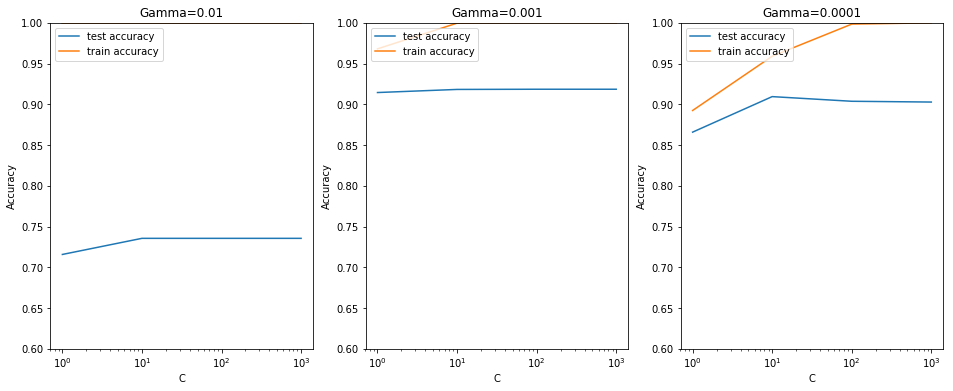

In [78]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [79]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9185714285714286 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


### Building the Final Model

Let's now build the final model, i.e. the model with highest test accuracy.

In [80]:
# model with optimal hyperparameters

# model
model = SVC(C=100, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")



accuracy 0.9311111111111111 



##### Accuracy of 93.1% is high enough. Lets predict the outcome using this on a test dataset.

In [81]:
digits_test = scaler.transform(digits_test)

digits_pred = model.predict(digits_test)

digits_pred.shape

(28000,)

In [82]:
digits_pred_df = pd.DataFrame({'label':digits_pred})

digits_final = pd.concat([digits_pred_df,digits_test_bkup],axis=1)

digits_final.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
